In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
results_dir = '/home/user/Documents/workspace/bigdataneurolab/thesis/optimization_project/dask_io_experiments/tmp_dir/exp1'
results_path = os.path.join(results_dir, "exp1_boundmem.csv")
csv_data = pd.read_csv(results_path)

In [3]:
csv_data.head()

,hardware,cuboid_name,array_shape,chunk_type,chunk_shape,optimized,buffer_size,nthreads,processing_time_split,processing_time_merge,diagnostics_split,diagnostics_merge,monitor_split,monitor_merge,success_run_split,success_run_merge
0,ssd,big,"(3500, 3500, 3500)",blocks,"(500, 500, 500)",False,15000000000,NaN,3707.9696,801.1590,/home/gtimothee/outputs/24a2c0d0-e9b9-4ce5-b08...,/home/gtimothee/outputs/24a2c0d0-e9b9-4ce5-b08...,/home/gtimothee/outputs/24a2c0d0-e9b9-4ce5-b08...,/home/gtimothee/outputs/24a2c0d0-e9b9-4ce5-b08...,True,True
1,ssd,big,"(3500, 3500, 3500)",blocks,"(875, 875, 875)",True,15000000000,1.0,3598.6934,682.1119,/home/gtimothee/outputs/dce0bf4f-3416-41f3-8ee...,/home/gtimothee/outputs/dce0bf4f-3416-41f3-8ee...,/home/gtimothee/outputs/dce0bf4f-3416-41f3-8ee...,/home/gtimothee/outputs/dce0bf4f-3416-41f3-8ee...,True,True
2,ssd,big,"(3500, 3500, 3500)",slabs,"(28, 3500, 3500)",False,15000000000,NaN,3571.0658,531.4099,/home/gtimothee/outputs/047a2765-c9e1-49f0-b7f...,/home/gtimothee/outputs/047a2765-c9e1-49f0-b7f...,/home/gtimothee/outputs/047a2765-c9e1-49f0-b7f...,/home/gtimothee/outputs/047a2765-c9e1-49f0-b7f...,True,True
3,ssd,big,"(3500, 3500, 3500)",slabs,"(28, 3500, 3500)",True,15000000000,1.0,3577.4051,532.0452,/home/gtimothee/outputs/cb65062e-ffc0-4178-b46...,/home/gtimothee/outputs/cb65062e-ffc0-4178-b46...,/home/gtimothee/outputs/cb65062e-ffc0-4178-b46...,/home/gtimothee/outputs/cb65062e-ffc0-4178-b46...,True,True
4,ssd,big,"(3500, 3500, 3500)",blocks,"(875, 875, 875)",False,15000000000,NaN,3648.0422,784.8303,/home/gtimothee/outputs/40c04f3c-a31d-4e37-abe...,/home/gtimothee/outputs/40c04f3c-a31d-4e37-abe...,/home/gtimothee/outputs/40c04f3c-a31d-4e37-abe...,/home/gtimothee/outputs/40c04f3c-a31d-4e37-abe...,True,True


In [4]:
print("Number entries:", len(csv_data.index))

Number entries: 10


In [5]:
big_arr_data = csv_data[csv_data["cuboid_name"]=="big"]
big_arr_ssd = big_arr_data[big_arr_data["hardware"]=="ssd"].drop(columns=["hardware", 
    "diagnostics_split", 
    "diagnostics_merge",
    "monitor_split", 
    "monitor_merge",
    "cuboid_name",
    "array_shape",
    "buffer_size",
    "nthreads"])
big_arr_ssd_blocks = big_arr_ssd[big_arr_ssd["chunk_type"]=="blocks"].drop(columns=["chunk_type"])
big_arr_ssd_slabs = big_arr_ssd[big_arr_ssd["chunk_type"]=="slabs"].drop(columns=["chunk_type"])

In [6]:
big_arr_ssd_blocks_mean = big_arr_ssd_blocks.groupby(["chunk_shape", "optimized"]).mean()
big_arr_ssd_blocks_std = big_arr_ssd_blocks.groupby(["chunk_shape", "optimized"]).std()
big_arr_ssd_slabs_mean = big_arr_ssd_slabs.groupby(["chunk_shape", "optimized"]).mean()
big_arr_ssd_slabs_std = big_arr_ssd_slabs.groupby(["chunk_shape", "optimized"]).std()

In [7]:
big_arr_ssd_blocks_mean

processing_time_split  processing_time_merge  \
chunk_shape     optimized                                                 
(350, 350, 350) False                  3806.3569              2295.7497   
                True                   3632.4541              2328.7523   
(500, 500, 500) False                  3707.9696               801.1590   
                True                   3610.0539               806.1543   
(875, 875, 875) False                  3648.0422               784.8303   
                True                   3598.6934               682.1119   

                           success_run_split  success_run_merge  
chunk_shape     optimized                                        
(350, 350, 350) False                   True               True  
                True                    True               True  
(500, 500, 500) False                   True               True  
                True                    True               True  
(875, 875, 875) False                   True               True  
                True                    True               True

In [8]:
big_arr_ssd_slabs_mean

processing_time_split  processing_time_merge  \
chunk_shape      optimized                                                 
(28, 3500, 3500) False                  3571.0658               531.4099   
                 True                   3577.4051               532.0452   
(50, 3500, 3500) False                  3548.0992               533.7815   
                 True                   3558.5605               528.1088   

                            success_run_split  success_run_merge  
chunk_shape      optimized                                        
(28, 3500, 3500) False                   True               True  
                 True                    True               True  
(50, 3500, 3500) False                   True               True  
                 True                    True               True

In [9]:
blocks_mean_1 = big_arr_ssd_blocks_mean.xs('(350, 350, 350)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])
blocks_mean_2 = big_arr_ssd_blocks_mean.xs('(500, 500, 500)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])
blocks_mean_3 = big_arr_ssd_blocks_mean.xs('(875, 875, 875)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])
blocks_std_1 = big_arr_ssd_blocks_std.xs('(350, 350, 350)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])
blocks_std_2 = big_arr_ssd_blocks_std.xs('(500, 500, 500)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])
blocks_std_3 = big_arr_ssd_blocks_std.xs('(875, 875, 875)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])

In [10]:
slabs_mean_1 = big_arr_ssd_slabs_mean.xs('(28, 3500, 3500)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])
slabs_mean_2 = big_arr_ssd_slabs_mean.xs('(50, 3500, 3500)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])
slabs_std_1 = big_arr_ssd_slabs_std.xs('(28, 3500, 3500)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])
slabs_std_2 = big_arr_ssd_slabs_std.xs('(50, 3500, 3500)', level='chunk_shape').drop(columns=["success_run_split", "success_run_merge"])

Text(0.5, 0.98, 'Results of experiment 2 for blocks')

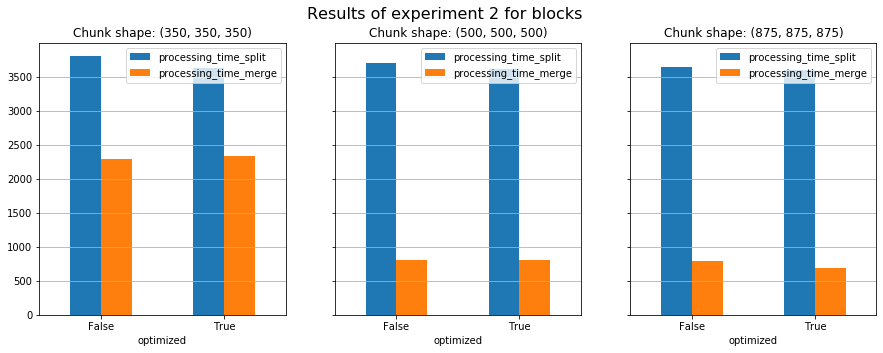

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
blocks_mean_1.plot(kind="bar", ax=axes[0], yerr=blocks_std_1, rot=0, title="Chunk shape: (350, 350, 350)")
blocks_mean_2.plot(kind="bar", ax=axes[1], yerr=blocks_std_2, rot=0, title="Chunk shape: (500, 500, 500)")
blocks_mean_3.plot(kind="bar", ax=axes[2], yerr=blocks_std_3, rot=0, title="Chunk shape: (875, 875, 875)")
axes[0].grid(axis="y")
axes[1].grid(axis="y")
axes[2].grid(axis="y")
fig.suptitle('Results of experiment 2 for blocks', fontsize=16)

Text(0.5, 0.98, 'Results of experiment 2 for slabs')

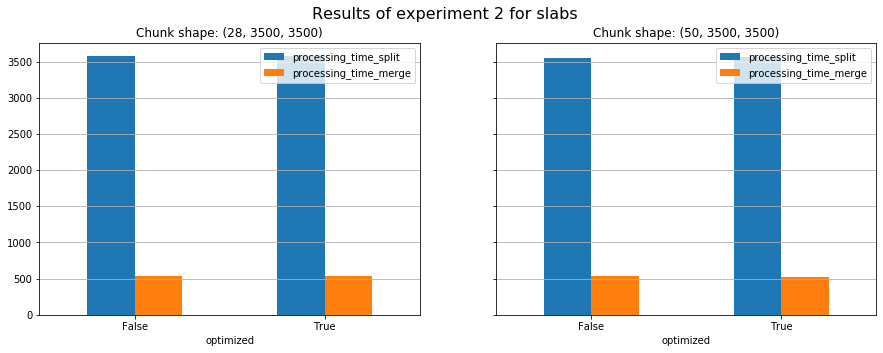

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)
slabs_mean_1.plot(kind="bar", ax=axes[0], yerr=slabs_std_1, rot=0, title="Chunk shape: (28, 3500, 3500)")
slabs_mean_2.plot(kind="bar", ax=axes[1], yerr=slabs_std_2, rot=0, title="Chunk shape: (50, 3500, 3500)")
axes[0].grid(axis="y")
axes[1].grid(axis="y")
fig.suptitle('Results of experiment 2 for slabs', fontsize=16)

In [13]:
imgfilepath = "/home/user/Documents/workspace/bigdataneurolab/thesis/optimization_project/dask_io_experiments/tmp_dir/second.png"
fig.savefig(imgfilepath)